In [12]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
path = '/Users/varyabazilova/Desktop/paper2/downscaling_simple/transport_limited/langtang/'
df = pd.read_csv(path + 'langtang_tl_percentiles_with_coors.csv')
# len(df.columns)
df.columns

Index(['cellnr', 'annual_mean_Qstl_mm', 'annual_25percent_Qstl_mm',
       'annual_50percent_Qstl_mm', 'annual_75percent_Qstl_mm',
       'annual_mean_Qstl_m3', 'annual_25percent_Qstl_m3',
       'annual_50percent_Qstl_m3', 'annual_75percent_Qstl_m3',
       'annual_mean_Qstl_m3_day', 'annual_25percent_Qstl_m3_day',
       'annual_50percent_Qstl_m3_day', 'annual_75percent_Qstl_m3_day',
       'Latitude', 'Longitude', 'z'],
      dtype='object')

In [14]:
ds = df.set_index(['Latitude', 'Longitude']).to_xarray()


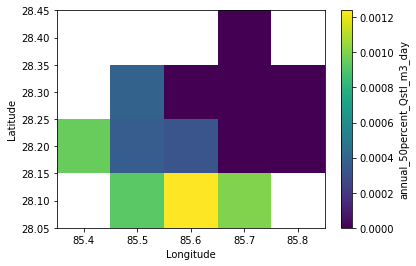

In [15]:
ds.annual_50percent_Qstl_m3_day.plot()


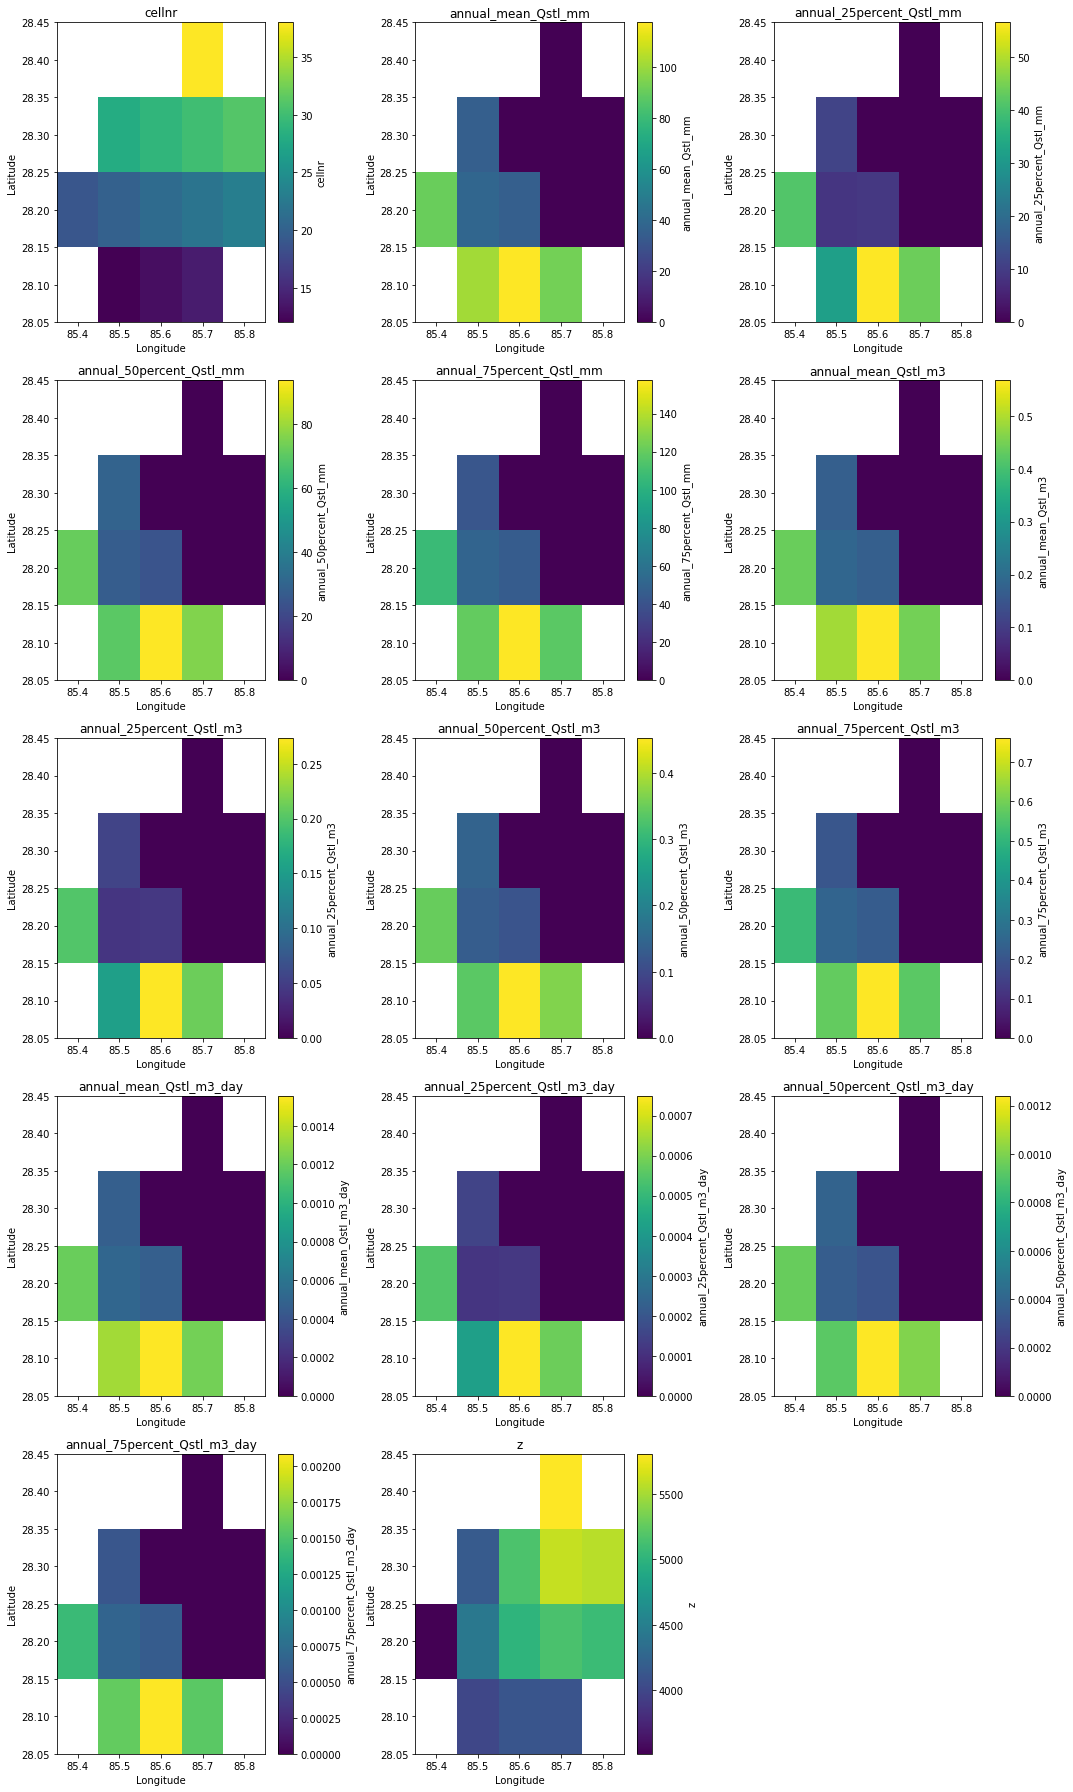

In [25]:
import matplotlib.pyplot as plt
import math

# Assuming ds is a Dataset object from xarray
num_vars = len(ds.data_vars)
cols = 3  # Number of columns for subplots
rows = math.ceil(num_vars / cols)  # Calculate number of rows

fig, axs = plt.subplots(rows, cols, figsize=(15, 5*rows))  # Adjust figsize as needed

# Flatten the axs array to iterate over subplots properly
axs = axs.flatten()

for i, (var_name, var_data) in enumerate(ds.items()):
    # Plotting on the ith axis
    var_data.plot(ax=axs[i])
    axs[i].set_title(var_name)

# Hide empty subplots
for i in range(num_vars, len(axs)):
    axs[i].axis('off')

plt.tight_layout()
plt.show()


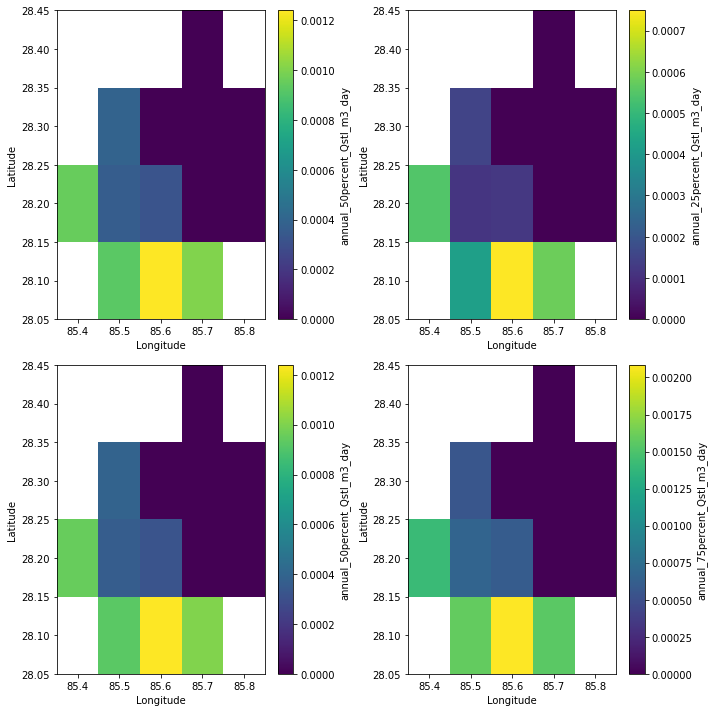

In [51]:
fig = plt.figure(figsize=(10, 10))
mosaic = fig.subplot_mosaic('''
                            ab
                            cd
                            ''')

ds.annual_50percent_Qstl_m3_day.plot(ax=mosaic['a'])
ds.annual_25percent_Qstl_m3_day.plot(ax=mosaic['b'])
ds.annual_50percent_Qstl_m3_day.plot(ax=mosaic['c'])
ds.annual_75percent_Qstl_m3_day.plot(ax=mosaic['d'])

plt.tight_layout()
